In [32]:
import pandas as pd
import numpy as np
import json

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import RidgeCV
%matplotlib inline

## Dataset Finalization

After scraping a second round of data to ensure that the critical reception ratings of `metascore` and `tomatometer` were robustly represented, I did a last round of visualizations.  I then prepared the one hot encoding categories on the full dataset, in preparation for the linear regression process.

In [14]:
itmb = pd.read_json('itmb_rated_cleaned.json', lines=True)

In [15]:
itmb.shape

(482, 25)

In [22]:
itmb.describe()

,year,runtime,imdb_rating,votes,metascore,tomatometer,tomato_ct,aud_score,budget,dom_gross_y,ww_gross,dir_film_ct2,dir_film_ct4
count,478.000000,474.000000,473.000000,4.730000e+02,443.000000,357.000000,324.000000,323.000000,4.820000e+02,4.820000e+02,4.820000e+02,482.000000,482.000000
mean,2004.958159,108.675105,6.264693,1.989260e+05,52.101580,53.022409,145.601852,57.467492,6.236630e+07,7.299233e+07,7.299233e+07,0.238589,0.122407
std,11.223026,17.344901,1.107639,2.527272e+05,17.792445,27.555757,101.106688,21.059838,5.631762e+07,1.013372e+08,1.013372e+08,0.426664,0.328095
min,1968.000000,75.000000,1.900000,1.376000e+03,6.000000,0.000000,5.000000,11.000000,3.000000e+06,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1999.000000,95.000000,5.700000,4.058300e+04,40.000000,29.000000,64.750000,41.500000,1.825000e+07,1.401300e+07,1.401300e+07,0.000000,0.000000
50%,2008.000000,106.000000,6.300000,1.024370e+05,51.000000,51.000000,123.000000,57.000000,4.000000e+07,3.740647e+07,3.740647e+07,0.000000,0.000000
75%,2014.000000,119.000000,7.000000,2.514310e+05,65.000000,78.000000,212.500000,76.000000,9.000000e+07,8.959753e+07,8.959753e+07,0.000000,0.000000
max,2021.000000,177.000000,8.800000,2.060446e+06,96.000000,100.000000,525.000000,95.000000,3.000000e+08,7.605076e+08,7.605076e+08,1.000000,1.000000


In [17]:
itmb.columns

Index(['title', 'imdb_id', 'year', 'runtime', 'mpaa_rating', 'director_name',
       'genre_01', 'genre_02', 'genre_03', 'imdb_rating', 'votes', 'metascore',
       'title_cc', 'dom_gross_x', 'tomatometer', 'tomato_ct', 'aud_score',
       'aud_score_ct', 'budget', 'dom_gross_y', 'ww_gross', 'release_date',
       'dir_film_ct2', 'dir_film_ct4', 'director_count7'],
      dtype='object')

In [18]:
itmb = itmb.drop(columns='director_count7')

In [20]:
itmb = itmb.drop(columns='dom_gross_x')

In [21]:
itmb.columns

Index(['title', 'imdb_id', 'year', 'runtime', 'mpaa_rating', 'director_name',
       'genre_01', 'genre_02', 'genre_03', 'imdb_rating', 'votes', 'metascore',
       'title_cc', 'tomatometer', 'tomato_ct', 'aud_score', 'aud_score_ct',
       'budget', 'dom_gross_y', 'ww_gross', 'release_date', 'dir_film_ct2',
       'dir_film_ct4'],
      dtype='object')

In [112]:
itmb['age'] = 2021 - itmb_total['year']
itmb['gross']=itmb['dom_gross_y']

In [114]:
itmb_numbers = itmb[['title','year','age', 'release_date', 'runtime', 'budget', 'gross']]

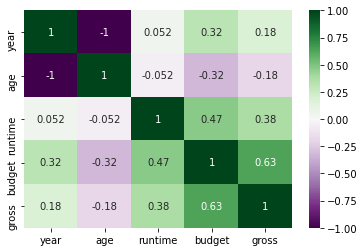

In [115]:
sns.heatmap(itmb_numbers.corr(), cmap="PRGn", annot=True, vmin=-1, vmax=1);

Text(0.5, 1.0, 'The Numbers')

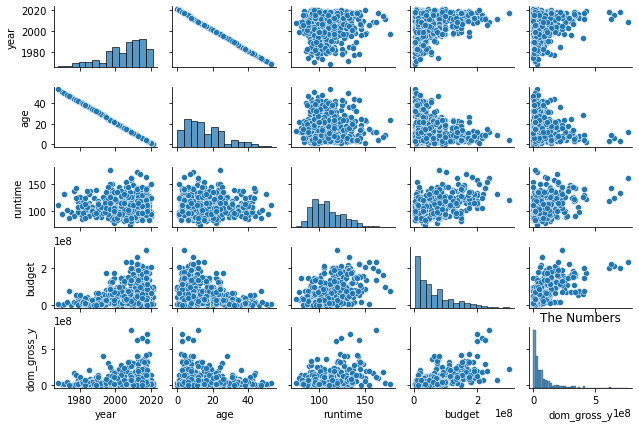

In [107]:
sns.pairplot(itmb_numbers, height = 1.2, aspect=1.5);
plt.title("The Numbers")


In [ ]:
itmb_dirs['dom_gross']= itmb_dirs

In [56]:
itmb_dirs = itmb[['title','year', 'release_date', 'runtime', 'budget', 'dom_gross_y','dir_film_ct2',
       'dir_film_ct4']]

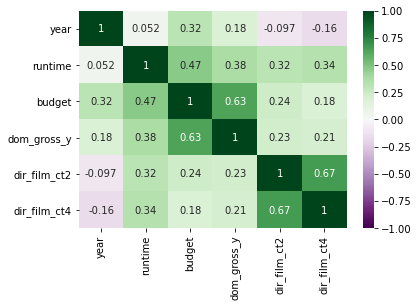

In [57]:
sns.heatmap(itmb_dirs.corr(), cmap="PRGn", annot=True, vmin=-1, vmax=1);

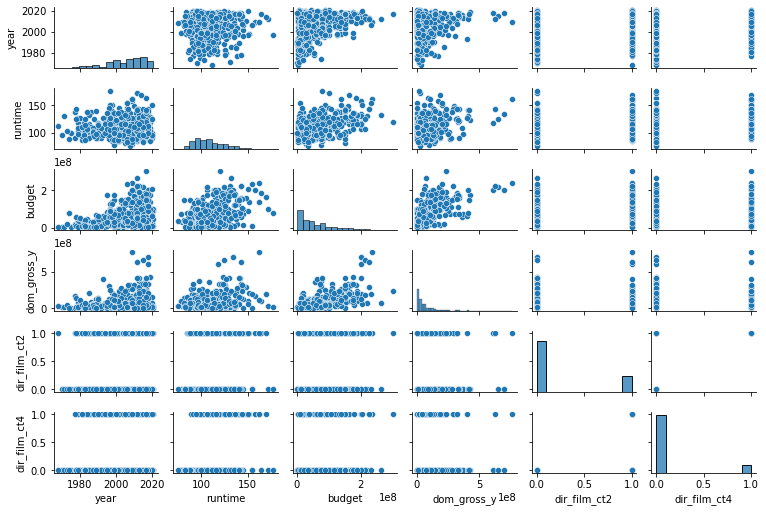

In [58]:
sns.pairplot(itmb_dirs, height = 1.2, aspect=1.5);

In [59]:
itmb['mpaa_rating'] = itmb['mpaa_rating'].replace(np.nan, 'Not Rated')

In [60]:
itmb['mpaa_rating'].value_counts()

PG-13        209
R            158
PG            93
Not Rated     14
G              8
Name: mpaa_rating, dtype: int64

In [61]:
rate_X = itmb.loc[:,['mpaa_rating']]
rate_y = itmb['mpaa_rating']

ohe = OneHotEncoder(drop=['PG-13'],sparse=False)  # chose most common MPAA rating

ohe.fit(rate_X)

ohe_X = ohe.transform(rate_X)

columns = ohe.get_feature_names(['mpaa_rating'])

ohe_rate_df = pd.DataFrame(ohe_X, columns=columns, index=rate_X.index)

ohe_rate_df.head()

,mpaa_rating_G,mpaa_rating_Not Rated,mpaa_rating_PG,mpaa_rating_R
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [62]:
itmb_mpaa = pd.concat([itmb_numbers, ohe_rate_df], axis = 1)
itmb_mpaa.shape

(482, 10)

In [63]:
itmb_mpaa.columns

Index(['title', 'year', 'release_date', 'runtime', 'budget', 'dom_gross_y',
       'mpaa_rating_G', 'mpaa_rating_Not Rated', 'mpaa_rating_PG',
       'mpaa_rating_R'],
      dtype='object')

In [64]:
itmb['genre_01'].value_counts()

Action       264
Drama         61
Comedy        40
Adventure     38
Animation     36
Horror        29
Sci-Fi         5
Mystery        4
Fantasy        2
Crime          1
Family         1
Romance        1
Name: genre_01, dtype: int64

In [65]:
genre_X = itmb.loc[:,['genre_01']]
genre_y = itmb['genre_01']

ohe = OneHotEncoder(drop=['Sci-Fi'], sparse=False)

ohe.fit(genre_X)

ohe_X = ohe.transform(genre_X)

columns = ohe.get_feature_names(['genre_01'])

ohe_genre_df = pd.DataFrame(ohe_X, columns=columns, index=genre_X.index)

ohe_genre_df.head()

,genre_01_Action,genre_01_Adventure,genre_01_Animation,genre_01_Comedy,genre_01_Crime,genre_01_Drama,genre_01_Family,genre_01_Fantasy,genre_01_Horror,genre_01_Mystery,genre_01_Romance
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
itmb_genre = pd.concat([itmb_numbers, ohe_genre_df], axis = 1)
itmb_genre.shape

(482, 17)

In [95]:
itmb_total = pd.concat([itmb_mpaa, ohe_genre_df], axis=1)
itmb_total.shape

(482, 21)

In [96]:
itmb.columns

Index(['title', 'imdb_id', 'year', 'runtime', 'mpaa_rating', 'director_name',
       'genre_01', 'genre_02', 'genre_03', 'imdb_rating', 'votes', 'metascore',
       'title_cc', 'tomatometer', 'tomato_ct', 'aud_score', 'aud_score_ct',
       'budget', 'dom_gross_y', 'ww_gross', 'release_date', 'dir_film_ct2',
       'dir_film_ct4'],
      dtype='object')

In [97]:
itmb_total.columns

Index(['title', 'year', 'release_date', 'runtime', 'budget', 'dom_gross_y',
       'mpaa_rating_G', 'mpaa_rating_Not Rated', 'mpaa_rating_PG',
       'mpaa_rating_R', 'genre_01_Action', 'genre_01_Adventure',
       'genre_01_Animation', 'genre_01_Comedy', 'genre_01_Crime',
       'genre_01_Drama', 'genre_01_Family', 'genre_01_Fantasy',
       'genre_01_Horror', 'genre_01_Mystery', 'genre_01_Romance'],
      dtype='object')

In [98]:
itmb_scores = itmb[['director_name','dir_film_ct2', 'dir_film_ct4', 'tomatometer', 'tomato_ct', 'aud_score', 'aud_score_ct', 'imdb_rating', 'votes', 'metascore']]

In [99]:
itmb_total = pd.concat([itmb_total, itmb_scores], axis=1)

In [100]:
itmb_total.columns

Index(['title', 'year', 'release_date', 'runtime', 'budget', 'dom_gross_y',
       'mpaa_rating_G', 'mpaa_rating_Not Rated', 'mpaa_rating_PG',
       'mpaa_rating_R', 'genre_01_Action', 'genre_01_Adventure',
       'genre_01_Animation', 'genre_01_Comedy', 'genre_01_Crime',
       'genre_01_Drama', 'genre_01_Family', 'genre_01_Fantasy',
       'genre_01_Horror', 'genre_01_Mystery', 'genre_01_Romance',
       'director_name', 'dir_film_ct2', 'dir_film_ct4', 'tomatometer',
       'tomato_ct', 'aud_score', 'aud_score_ct', 'imdb_rating', 'votes',
       'metascore'],
      dtype='object')

In [101]:
itmb.shape

(482, 23)

In [102]:
itmb_total.to_json('itmb_total.json', orient='records', lines=True)